In [1]:
### Useful Variables ###

NUM_SEEDS = 20
NUM_AGENTS = 10
SAMPLE_MODE = "top"
NORMALIZE = False
STACK = False

ENV_NAME = "BipedalWalker-v2"
RUN_NAME = "PPO"
DEFAULT_CONFIG = {}

YAML_PATH = "data/300-agents-ppo.yaml"

In [2]:
import numpy as np

import ray
from ray.rllib.agents.registry import get_agent_class
import yaml
import seaborn as sns

from process_data import make_ordereddict
from process_fft import evaluate_different_agents

%matplotlib inline
ray.init(ignore_reinit_error=True, log_to_driver=False)

W0817 13:44:57.422861 139658164385536 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
2019-08-17 13:44:59,469	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-17_13-44-59_467203_30229/logs.
2019-08-17 13:44:59,606	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:49261 to respond...
2019-08-17 13:44:59,745	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:19497 to respond...
2019-08-17 13:44:59,751	INFO services.py:809 -- Starting Redis shard with 10.0 GB max memory.
2019-08-17 13:44:59,801	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-17_13-44-59_467203_30229/logs.
2019-08-17 13:44:59

{'node_ip_address': '10.1.72.24',
 'redis_address': '10.1.72.24:49261',
 'object_store_address': '/tmp/ray/session_2019-08-17_13-44-59_467203_30229/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2019-08-17_13-44-59_467203_30229/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2019-08-17_13-44-59_467203_30229'}

In [3]:
def restore(ckpt):
    cls = get_agent_class(RUN_NAME)
    agent = cls(env=ENV_NAME, config=DEFAULT_CONFIG)
    agent.restore(ckpt)
    return agent

In [4]:
with open(YAML_PATH, 'r') as f:
    checkpoints = yaml.safe_load(f)

In [5]:
agent_ckpt_dict = make_ordereddict(checkpoints, NUM_AGENTS, 
                                   mode=SAMPLE_MODE)
agent_dict = {
    agent_name: restore(ckpt) 
    for agent_name, ckpt in agent_ckpt_dict.items()
}

W0817 13:45:01.342576 139658164385536 deprecation_wrapper.py:119] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/tune/logger.py:133: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.

W0817 13:45:01.344820 139658164385536 deprecation_wrapper.py:119] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/tune/logger.py:138: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

2019-08-17 13:45:01,360	ERROR log_sync.py:34 -- Log sync requires cluster to be setup with `ray up`.
2019-08-17 13:45:01,501	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 13:45:01,932	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
W0817 13:45:03.788978 139658164385536 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/r

2019-08-17 13:45:43,108	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7efcda954320>}
2019-08-17 13:45:43,110	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7efcda954240>}
2019-08-17 13:45:43,112	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7efcda94df98>}
2019-08-17 13:45:43,163	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']
2019-08-17 13:45:46,982	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 13:45:46,993	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 13:45:49,046	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_temp

In [6]:
df = evaluate_different_agents(
    agent_dict, 
    list(range(NUM_SEEDS)), 
    normalize=NORMALIZE,
    stack_rollout=STACK
)

2019-08-17 13:46:04,699	INFO tf_run_builder.py:92 -- Executing TF run without tracing. To dump TF timeline traces to disk, set the TF_TIMELINE_DIR environment variable.


Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 0
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 1
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 2
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 3
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 4
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 5
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 6
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 7
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 8
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 9
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 10
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 11
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 12
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 13
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 14
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 15
Current Testing Agent: <PPO seed=193 rew=289.17>, Seed: 16
Current

Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 1
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 2
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 3
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 4
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 5
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 6
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 7
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 8
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 9
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 10
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 11
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 12
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 13
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 14
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 15
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 16
Current Testing Agent: <PPO seed=17 rew=294.70>, Seed: 17
Current Testing Agent: 

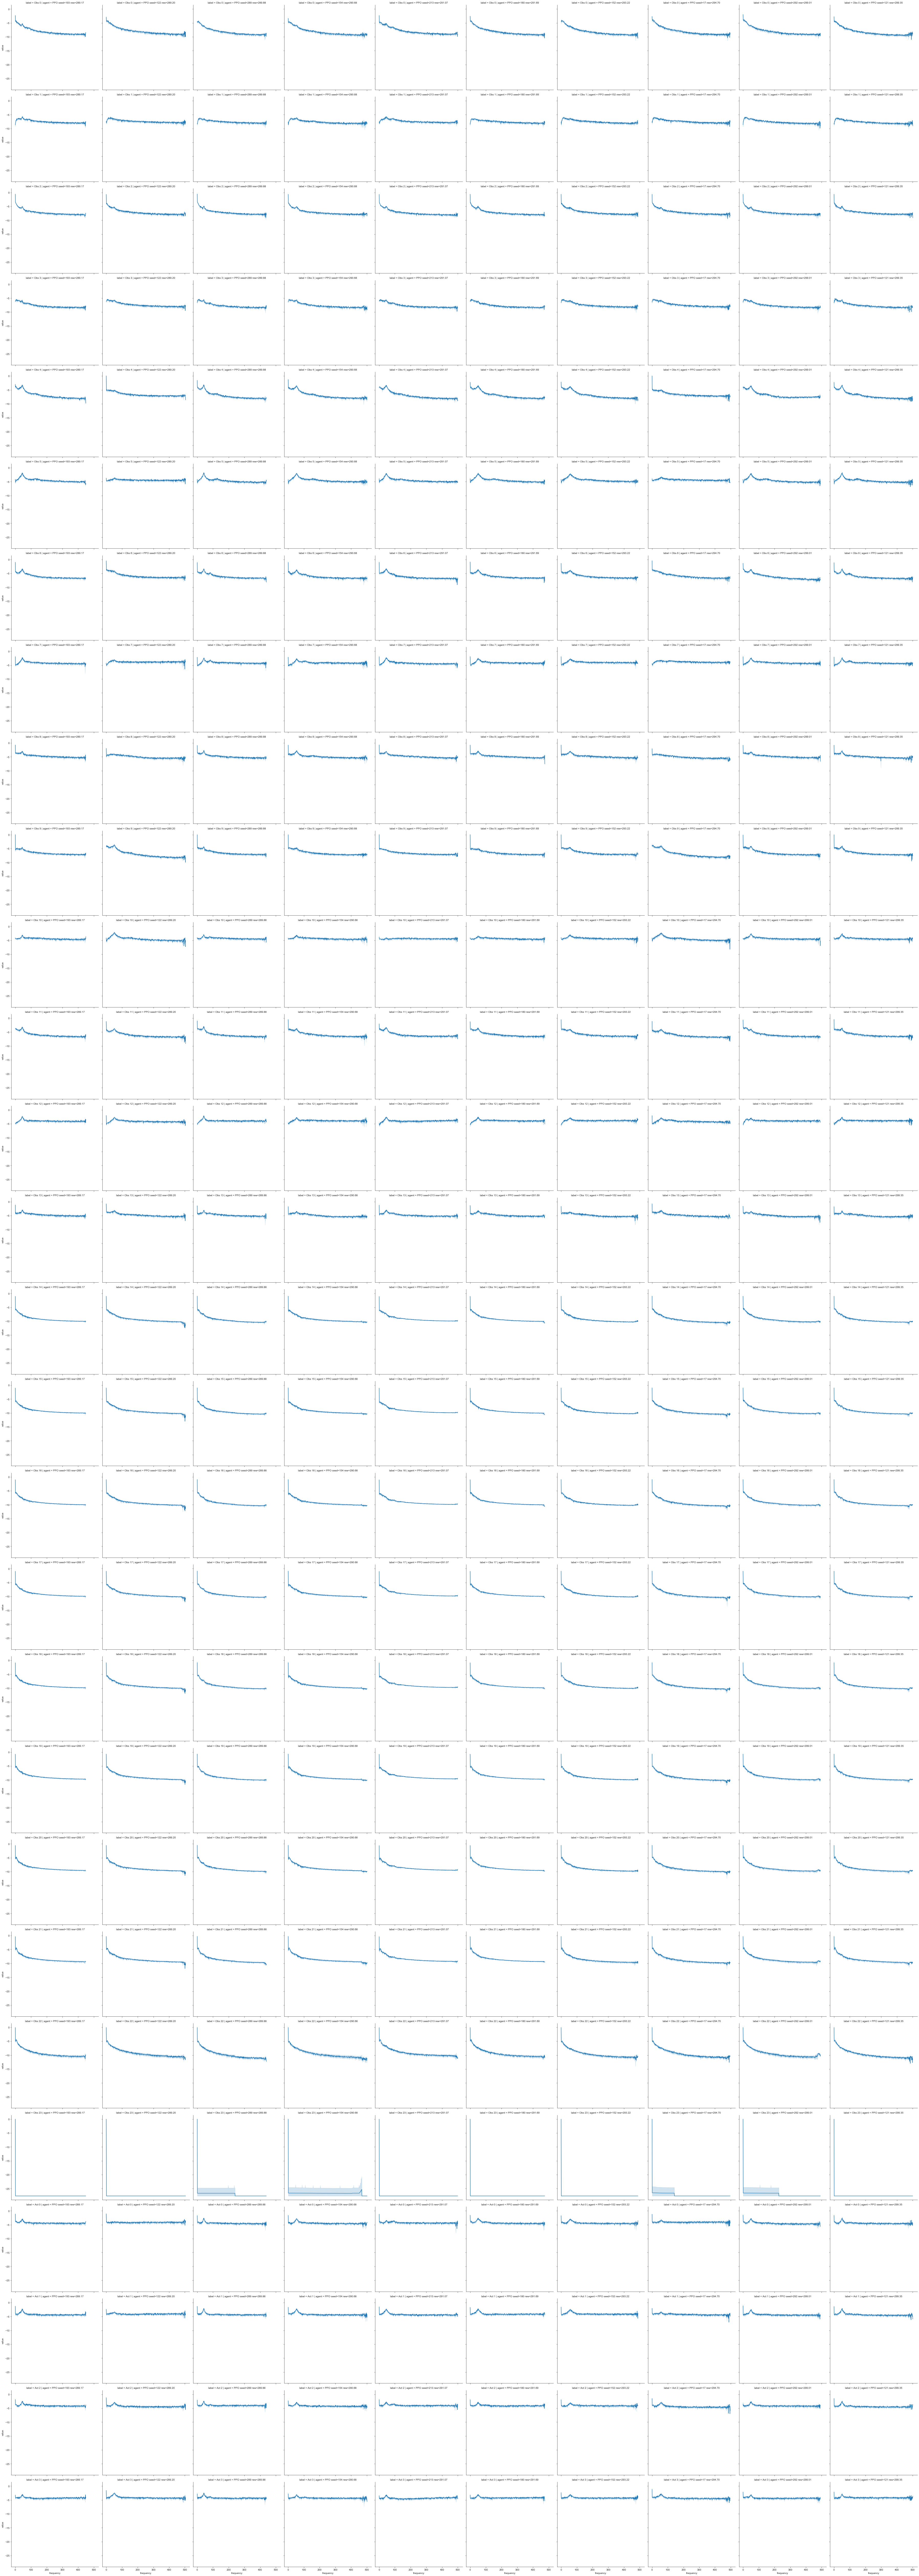

In [7]:
sns.set_style("ticks")
sns.relplot(x="frequency", y="value", col="agent", 
            row="label", kind="line", data=df)